# USB control of lamp

In [128]:
import usb.core
import usb.util
import time

# find our device
dev = usb.core.find(idVendor=0x2457, idProduct=0x7000)

# was it found?
if dev is None:
    raise ValueError('Device not found')

# set the active configuration. With no arguments, the first
# configuration will be the active one
dev.set_configuration()

# get an endpoint instance
cfg = dev.get_active_configuration()
intf = cfg[(0,0)]

ep_out = usb.util.find_descriptor(
    intf,
    # match the first OUT endpoint
    custom_match = \
    lambda e: \
        usb.util.endpoint_direction(e.bEndpointAddress) == \
        usb.util.ENDPOINT_OUT)

ep_in = usb.util.find_descriptor(
    intf,
    # match the first OUT endpoint
    custom_match = \
    lambda e: \
        usb.util.endpoint_direction(e.bEndpointAddress) == \
        usb.util.ENDPOINT_IN)

def bulb_on():
    ep_out.write('sbon|0')
    time.sleep(.1)
    response=ep_in.read(ep_in.wMaxPacketSize)
    text=''
    #for i in response:
    #    text=text+chr(i)
    #return text
    
def shutter_open():
    ep_out.write('sshstatus|1')
    time.sleep(.1)
    response=ep_in.read(ep_in.wMaxPacketSize)
    text=''
    #for i in response:
    #    text=text+chr(i)
    #return text

def shutter_close():
    ep_out.write('sshstatus|0')
    time.sleep(.1)
    response=ep_in.read(ep_in.wMaxPacketSize)
    text=''
    #for i in response:
    #    text=text+chr(i)
    #print(text)

# Seabreeze library

In [129]:
# We might need to go with the pyseabreeze backend
import seabreeze
seabreeze.use('pyseabreeze')

# Python interface
import seabreeze.spectrometers as sb

# to plot
import matplotlib.pyplot as plt
import numpy as np

# Test USB
import usb.core
usb.core.find()

# load list of spectrometers
devices = sb.list_devices()

# assign first spectrometer to variable
spectrometers=[]
for i in range(len(devices)):
    spectrometers.append(sb.Spectrometer(devices[i]))
    
print(devices)

spec_types=[]
for spec in spectrometers:
    model=spec.model
    if model=='USB2000PLUS':
        spec_types.append(spec.eeprom_read_slot(0))
    else:
        spec_types.append(model)
print spec_types


[<SeaBreezeDevice USB2000PLUS:FLMS00748>, <SeaBreezeDevice NIRQUEST512:NQ5200049>, <SeaBreezeDevice USB2000PLUS:FLMN01347>, <SeaBreezeDevice QEPRO:QEP00775>]
[u'FLMS00748', 'NIRQUEST512', u'FLMN01347', 'QEPRO']


# Test

In [130]:
bulb_on()

In [131]:
import time

def capture(light_condition):

    if (light_condition=='on'):
        shutter_open()
    else:
        shutter_close()
    
    waves=[]
    for spec in spectrometers:
        time.sleep(.2)
        waves.append(spec.intensities())
        
    shutter_close()
    
    return waves

In [132]:
spec_types

[u'FLMS00748', 'NIRQUEST512', u'FLMN01347', 'QEPRO']

In [135]:
for i in range(len(spectrometers)):
    spec=spectrometers[i]
    spec_type=spec_types[i]
    if spec_types[i]=='FLMN01446' or spec_types[i]=='FLMN01347' or spec_types[i]=='FLMN01444':
        print 'flame nir'
        spec.integration_time_micros(2000000)
        time.sleep(.2)
    if spec_types[i]=='NIRQUEST512':
        print 'nirquest'
        spec.integration_time_micros(2000000)
        time.sleep(.2)
    if spec_types[i]=='QEPRO':
        print 'qepro'
        spec.integration_time_micros(950000)
        time.sleep(.2)
    if spec_types[i]=='FLMS00742' or spec_types[i]=='FLMS00748' or spec_types[i]=='FLMS00404' or spec_types[i]=='FLMS00741':
        print 'flame'
        spec.integration_time_micros(10*80000)
        time.sleep(.2)
    
waves=capture('on')

flame
nirquest
flame nir
qepro


# CFI01

removing bad spec

0
1
2
3


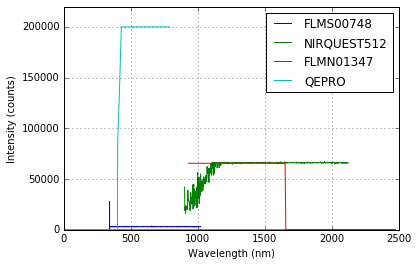

In [136]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=spec_types[i])
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# LCF01

assigning integration times

0
1
2
3


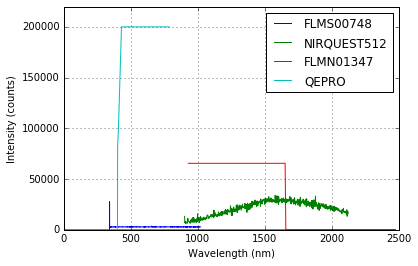

In [90]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=spec_types[i])
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# CF102

assigning integration times

0
1
2
3


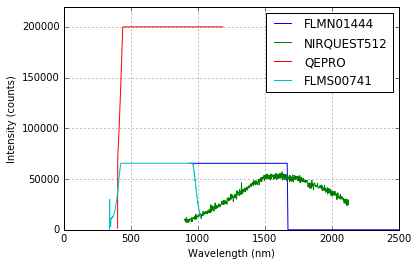

In [68]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=spec_types[i])
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# LCF01

assigning integration times

0
1
2
3


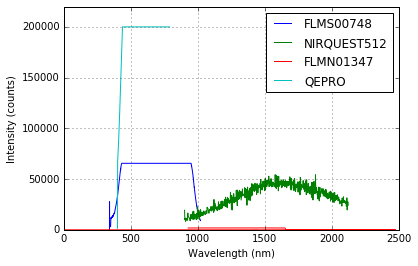

In [51]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=spec_types[i])
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# cf101

assigning integration times

0
1
2
3


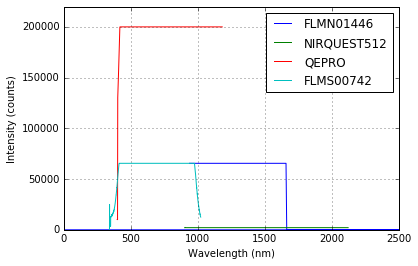

In [607]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=spec_types[i])
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# low-res 

assigning integration times

0
1
2
3


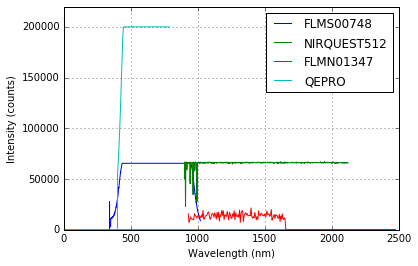

In [590]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=spec_types[i])
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# CF101 

assigning integration times

0
1
2
3


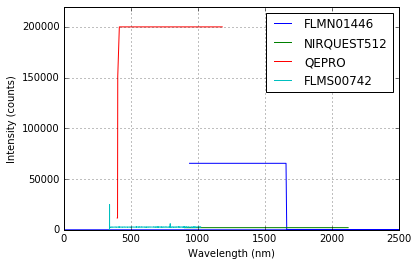

In [584]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=spec_types[i])
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# CF101 

assigning integration times

0
1
2
3
4


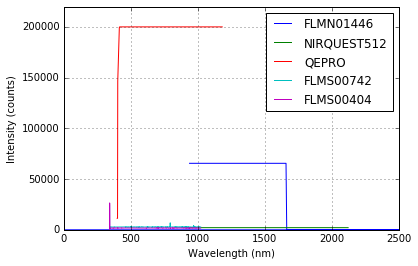

In [512]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=spec_type[i])
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# Low res -- trial 2

rememebering to turn bulb on

0
1
2
3


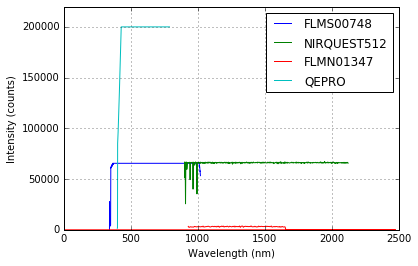

In [497]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=spec_type[i])
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# CF101 -- trial five

replacing front cover

0
1
2
3


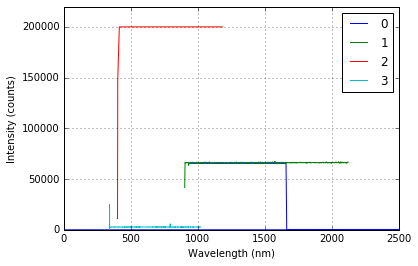

In [473]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=str(i))
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# CF101 -- trial four

returning to old FlameS

0
1
2
3


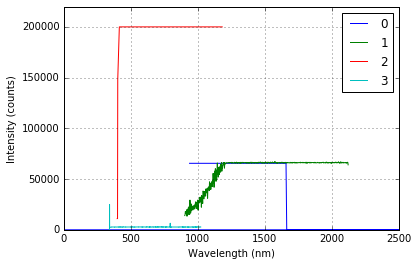

In [471]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=str(i))
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# CF101 -- trial three

replacing the FlameS

0
1
2
3


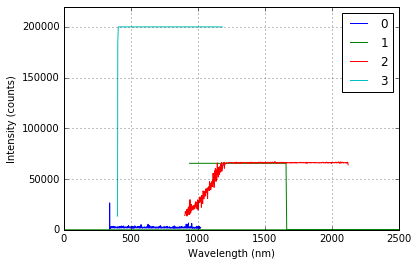

In [465]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=str(i))
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# CF101 -- trial two

0
1
2
3


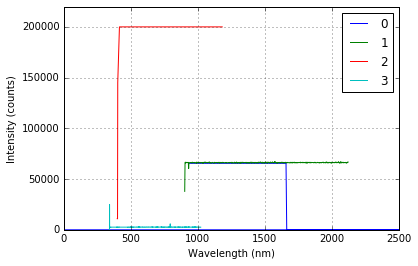

In [439]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=str(i))
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# CF101 -- trial one

0
1
2
3


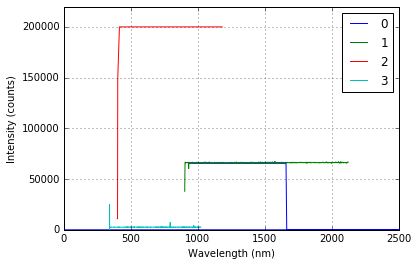

In [409]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=str(i))
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# CF102

0
1
2
3


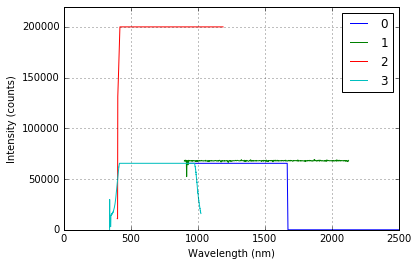

In [418]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=str(i))
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()

# Low Res

0
1
2
3


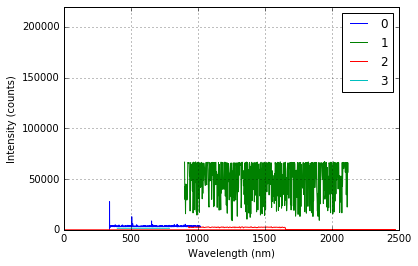

In [444]:
for i in range(len(waves)):

    print i
    plt.plot(spectrometers[i].wavelengths(),waves[i],label=str(i))
    #plt.plot(spec2.wavelengths(), spec2.intensities())

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (counts)')
    #plt.title('QEPRO')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2500)
    plt.ylim(0,220000)

plt.show()